# Feature Importance

as determined by the best performing random forest classifier

## imports and constants

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

## Load Model

In [7]:
MODEL_PATH = '/content/drive/My Drive/Colab Notebooks/models/'
MODEL_FILE_NAME = 'rand_forest_cv8.sav'

In [8]:
clf = joblib.load(MODEL_PATH+MODEL_FILE_NAME)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Access Feature Importances

In [9]:
feature_importances = clf.best_estimator_[2].feature_importances_

In [10]:
cols_to_scale = ['gps_height', 'num_private', 'population', 'construction_year']
cats = clf.best_estimator_[0].transformers_[1][1]['onehot'].get_feature_names()
cols = cols_to_scale + list(cats)
feature_importances_df = pd.DataFrame(feature_importances, index=cols, columns=['importance']).sort_values('importance', ascending=False)

In [11]:
feature_importances_df['feature'] = feature_importances_df.index

In [12]:
feature_importances_df.head(10)

,importance,feature
x8_dry,0.099060,x8_dry
gps_height,0.091081,gps_height
construction_year,0.086281,construction_year
population,0.067703,population
x10_other,0.031922,x10_other
x4_other,0.031920,x4_other
x8_enough,0.029958,x8_enough
x4_gravity,0.024550,x4_gravity
x8_insufficient,0.023068,x8_insufficient
x6_never pay,0.022703,x6_never pay


In [14]:
top_ten = feature_importances_df[:10]

In [15]:
top_ten.sort_values(by='importance', inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
top_ten

,importance,feature
x6_never pay,0.022703,x6_never pay
x8_insufficient,0.023068,x8_insufficient
x4_gravity,0.024550,x4_gravity
x8_enough,0.029958,x8_enough
x4_other,0.031920,x4_other
x10_other,0.031922,x10_other
population,0.067703,population
construction_year,0.086281,construction_year
gps_height,0.091081,gps_height
x8_dry,0.099060,x8_dry


In [19]:
feature_names = ['quantity - Dry', 'gps_height', 'construction_year', 'population', 'waterpoint type - other',
                 'extraction_type - other', 'quantity - enough', 'extraction_type - gravity',
                 'quantity - insufficient', 'payment - never pay']

In [26]:
feature_names.reverse()

In [27]:
feature_names

['payment - never pay',
 'quantity - insufficient',
 'extraction_type - gravity',
 'quantity - enough',
 'extraction_type - other',
 'waterpoint type - other',
 'population',
 'construction_year',
 'gps_height',
 'quantity - Dry']

## Display Feature Importances

<BarContainer object of 10 artists>

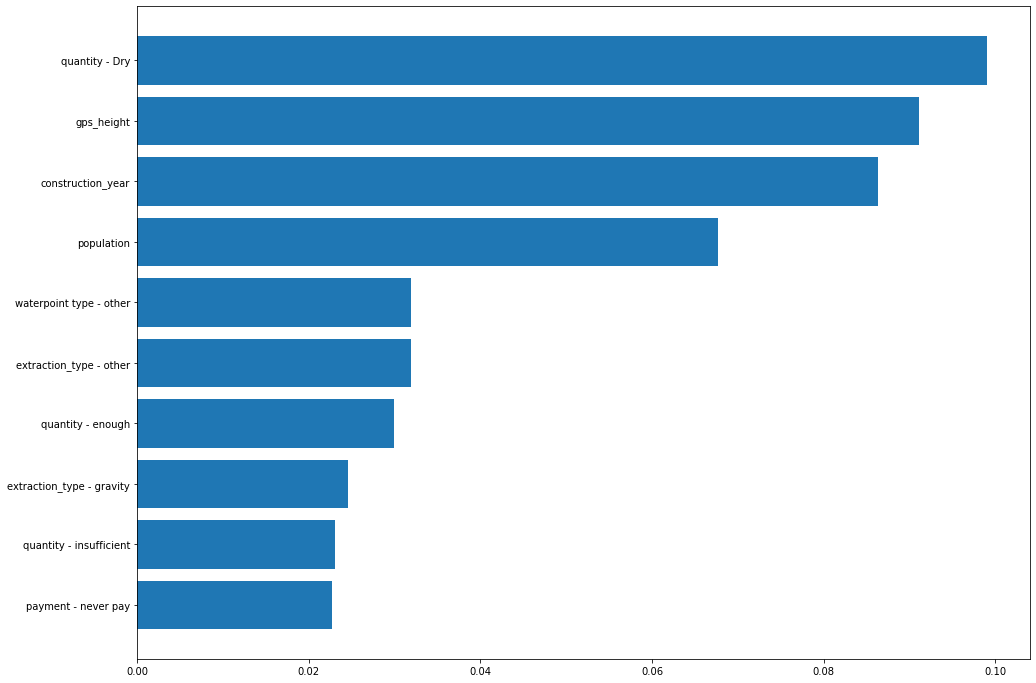

In [28]:
plt.figure(figsize=(16,12))
plt.barh(feature_names, top_ten['importance'])